In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
#!pip install wget
import wget
import os.path as path

## Ejercicio 6
En el caso de ajustes, es posible definir funciones de costo que midan la distancia entre los puntos muestrales y el modelo de ajuste. En el caso de mínimos cuadrados la función es $X^2$. Para $n$ puntos y un modelo lineal la función de costo es:

$ X^2(a_0,a_1) = \sum_{i=1}^{n}(y_i - (a_0+a_1x_i))^2 $

Si hablamos en terminos Bayesianos, $\Omega = {a_0, a_1}$ define el conjunto de modelos lineales que pueden explicar los $n$ puntos muestrales. Al minimizar $X^2(a_0,a_1)$ muestre (analíticamente) que los parámetros están dados por:

$ a_0 = \overline{y} - a_1\overline{x} $

$ a_1 = \frac{\sum xy - \frac{\sum x \sum y}{n}}{\sum x^2 - \frac{(\sum x)^2}{n}} $

donde $\overline{x}$ y $\overline{y}$ son los valores medios de puntos y sus imágenes. Para $n$ puntos y un modelo cuadrático la función de costo es:

$ X^2(a_0,a_1,a_2) = \sum_{i=1}^{n}(y_i - (a_0+a_1x_i+a_2x_i^2))^2 $

Minimiza $ X^2(a_0,a_1,a_2)$ para encontrar el siguiente sistema de ecuaciones. ¿Nota alguna regularidad?

$ \sum_{i=1}^{n}[a_0+x_ia_1+x_i^2a_2 = y_i] $

$ \sum_{i=1}^{n}[a_0x_i+a_1x_i^2+a_2x_i^3 = x_iy_i] $

$ \sum_{i=1}^{n}[a_0x_i^2+a_1x_i^3+a_2x_i^4 = x_i^2y_i] $

$\textbf{Opcionalme: }$Encuentre los parámetros usando estas expresiones para los problemas 2) y 3)

In [ ]:
img = mpimg.imread(point6.jpeg)
plt.imshow(img)
plt.show()

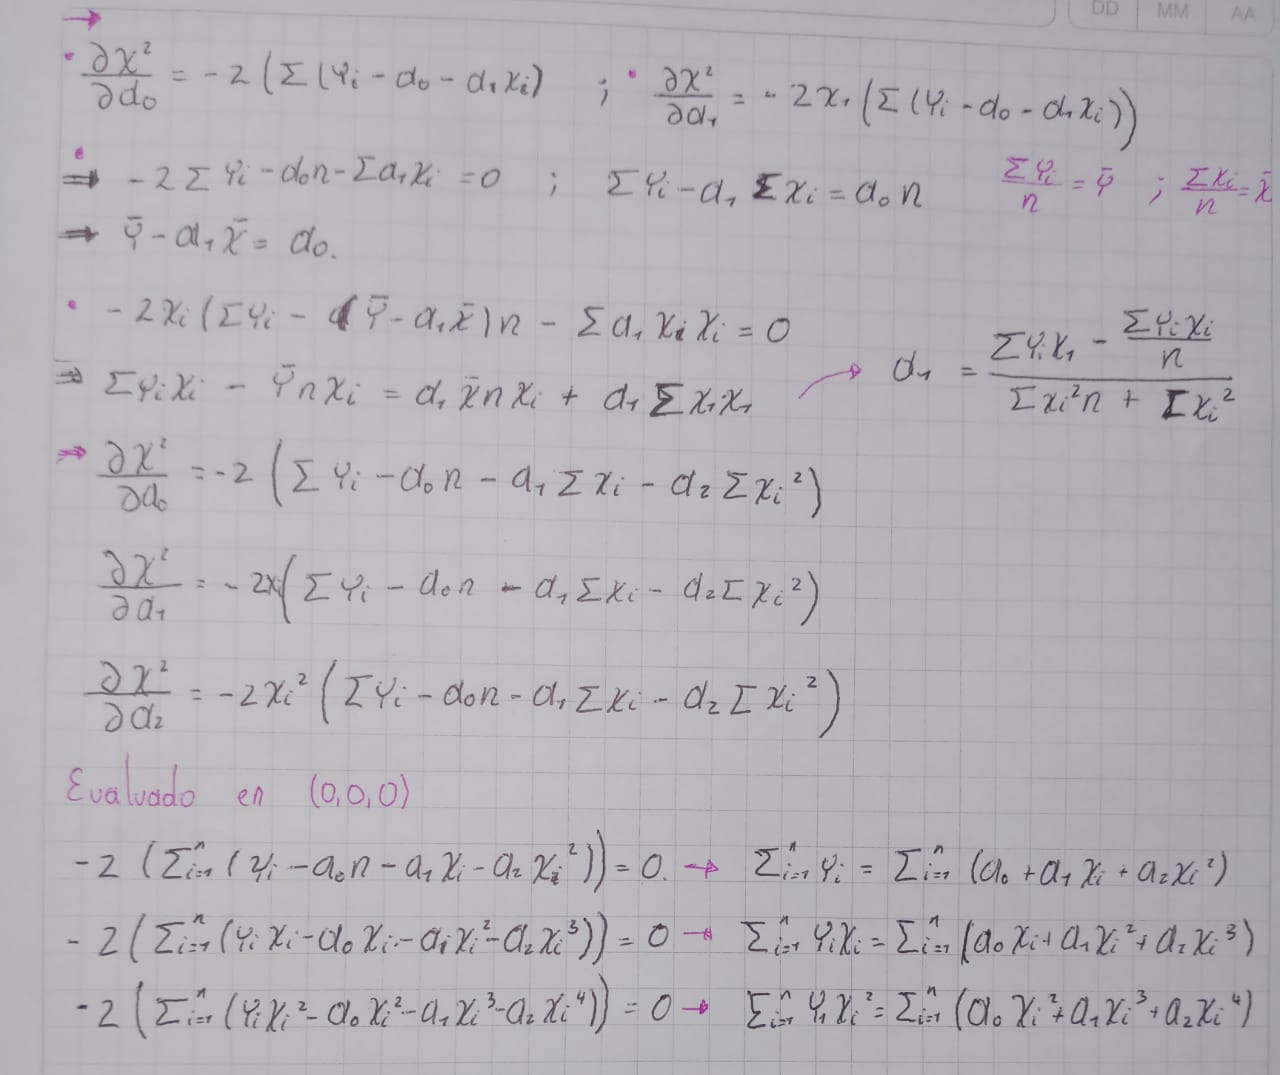

## Ejercicio 7
$\textbf{(Machine Learning: Logistic Regresion)}$ Descargue los datos de: https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Sigmoid.csv 

a) Defina el modelo de ajuste como: 

$ M(x;\overrightarrow{\theta}) = \frac{\theta_0}{\theta_1 + e^{-\theta_2x}} $

donde el $\overrightarrow{\theta}$ es el vector de parámetros del ajuste.

b) Defina la métrica (función de costo) a minimizar como:

$ X^2(\overrightarrow{\theta}) = \sum_{i=1}^{N}\big(\frac{y_i-M(x,\overrightarrow{\theta})}{\sigma_i}\big)^2 $

donde $ \sigma_i = 1 \forall _i $, es decir, no se consideran los errores de $y_i$.

c) Muestre que las derivadas parciales de la métrica están dadas por:

$ \frac{\partial X^2(\overrightarrow{\theta})}{\partial \theta_i} = -2\sum_{i=1}^{N}(y_i-M(x_i,\overrightarrow{\theta}))\frac{\partial M(x_i,\overrightarrow{\theta})}{\partial \theta_i}  $

d) Muestre que vectorialmente, el descenso del gradiente queda definido por:

$ \overrightarrow{\theta_{j+1}} = \overrightarrow{\theta_j} - \gamma \big( -2\sum_{i=1}^{N}(y_i-M(x_i,\overrightarrow{\theta_j}))\nabla_{\theta}M(x_i,\overrightarrow{\theta_j})\big) $

donde el gradiente es respecto a los parámetros:

$ \nabla_{\theta}M(x_i,\overrightarrow{\theta}) = \big[\frac{\partial M(x_i,\overrightarrow{\theta})}{\partial \theta_0},\frac{\partial M(x_i,\overrightarrow{\theta})}{\partial \theta_1},\frac{\partial M(x_i,\overrightarrow{\theta})}{\partial \theta_2} \big] $

e) Use una taza de aprendizaje $\gamma = 1 × 10^{−3} o \gamma = 5 × 10^{−4}, \overrightarrow{\theta_0} = [1,1,1] $, un error de parada $ \in=0.01 $ y un máximo de iteraciones de $ 1 × 10^4$.

f) Grafique los datos y the best fit model con sus parámetros.

In [11]:
#carga de datos
file = 'Sigmoid.csv'

url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Sigmoid.csv'
if not path.exists(file):
    Path_ = wget.download(url,file)
    print('File loaded')
else:
    Path_ = file

data = np.loadtxt(Path_,dtype=float,delimiter=",",skiprows=1)

x = data[:,0]
y = data[:,1]
N = len(x)

In [10]:
#a)
def M(x,th):
    return th[0]/(th[1]+np.exp(-th[2]*x))

In [9]:
#b)
def X2(th,x,y):
    term= y-M(x,th)
    return np.sum(term**2)

In [ ]:
img = mpimg.imread(point7_c_d.jpeg)
plt.imshow(img)
plt.show()

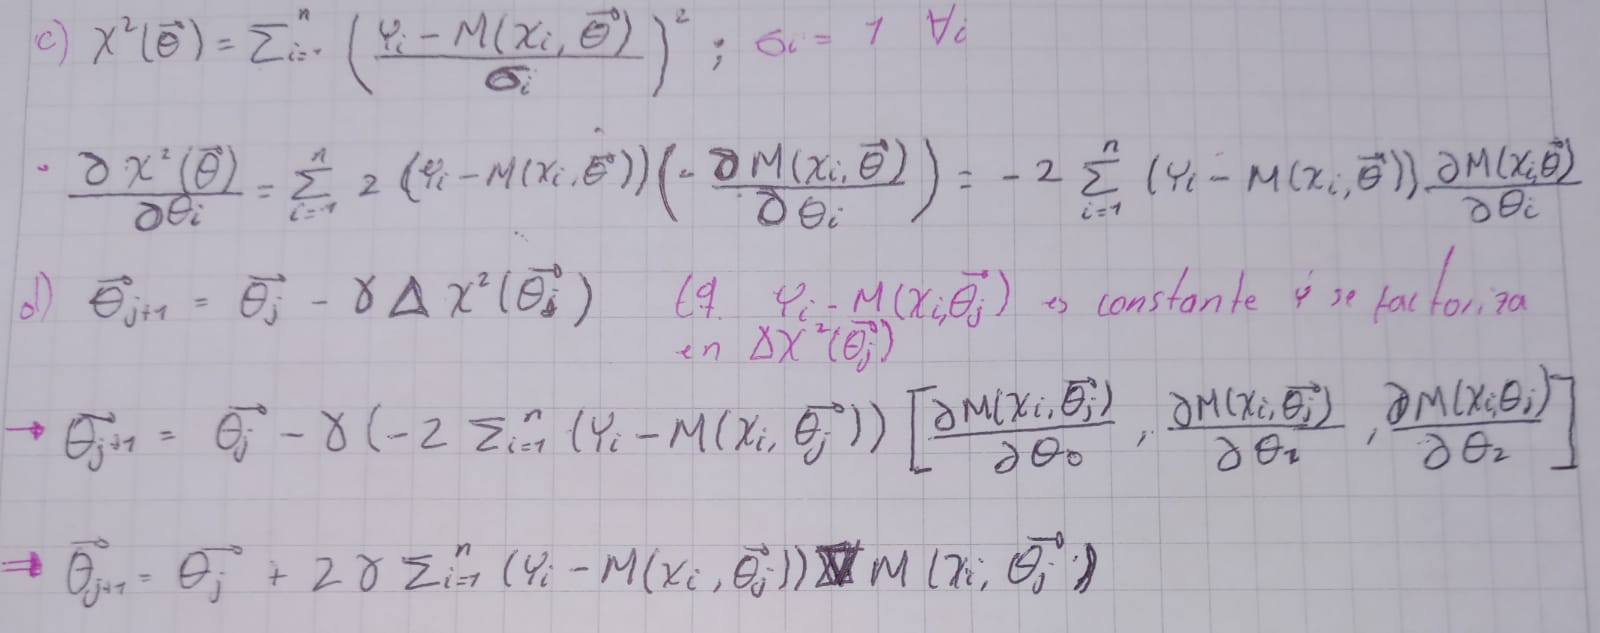

In [13]:
#e)
par0=np.array([1,1,1])
print(par0)

def GetGrad(M,th,x,h=1e-6):
    dim=len(th)
    J = np.zeros(dim)
    for j in range(dim):
        h_=np.zeros(dim)
        h_[j]=h           
        J[j] = (  M(x,th+h_) - M(x,th-h_) )/(2*h)            
    return J

def DescGrad(M,th,x,y,lr=1e-3,epochs=int(1e4),error=1e-2):
    d = 1
    it = 0
    print("Entrenamiento en curso...")
    while d > error and it < epochs:
        CurrentMe = X2(th,x,y)
        #print(CurrentMe)
        Sum=0
        #Machine Learning
        for i in range(len(y)):
            Sum += (y[i]-M(x[i],th))*GetGrad(M,th,x[i])
        #print(Sum)
        th = th - lr*(-2)*Sum
        NewMe = X2(th,x,y)
        #print(NewMe)
        d= np.abs(CurrentMe-NewMe)/NewMe
        d=np.sqrt(NewMe/len(y))  
        it += 1
    if d < error:
        print(' Entrenamiento completo ', d, 'iteraciones', it)
    if it == epochs:
        print(' Máximo de iteraciones alcanzado ',d)
    return th,it

par,num_it=DescGrad(M,par0,x,y)
print("parametros: ",par)

[1 1 1]
Entrenamiento en curso...
 Máximo de iteraciones alcanzado  0.045898487738864895
parametros:  [4.35688088 0.96529898 2.79303697]


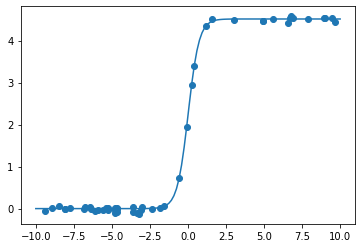

In [15]:
#g)
X=np.linspace(-10,10,120)
plt.scatter(x,y)
plt.plot(X,M(X,par))
plt.show()